In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("clean_data.csv")

In [4]:
order = df[["crawler", "price_limpo"]].groupby("crawler").mean().sort_values(by="price_limpo").index

<AxesSubplot:xlabel='price_limpo', ylabel='crawler'>

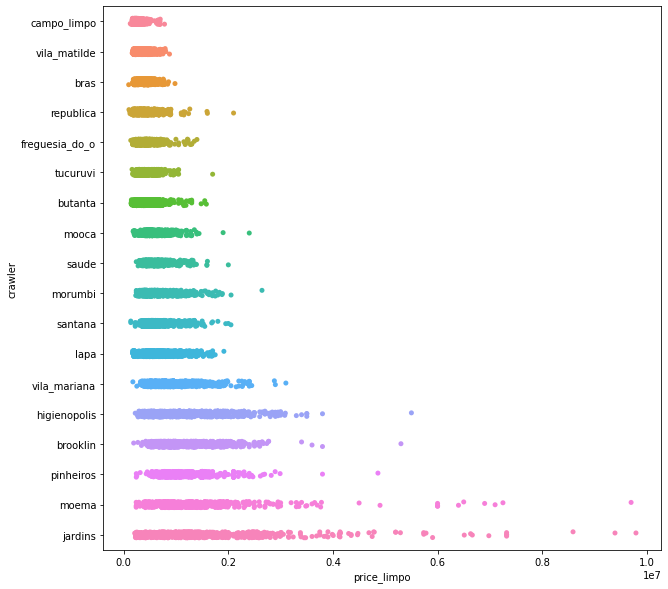

In [5]:
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="price_limpo", y= "crawler", order = order)

In [6]:
def iqr(df):
    q1,q3 = df.quantile([.25,.75])
    iqr= q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    pct_outliers = sum(~df.between(lower_bound,upper_bound))/len(~df.isnull())
    return lower_bound,upper_bound,round(pct_outliers,2)

def percentiles(df,percentil_level=.01):
    lower_bound = df.quantile(percentil_level)
    upper_bound = df.quantile(1-percentil_level)
    pct_outliers = sum(~df.between(lower_bound,upper_bound))/len(df)
    return lower_bound, upper_bound, round(pct_outliers,2)

In [7]:
coluna ="price_limpo"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>.035:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
    print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
    df.loc[(df["crawler"]==bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan

Coluna: price_limpo, bairro: brooklin, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: butanta, metodo: iqr, pct_outliers: 0.03
Coluna: price_limpo, bairro: republica, metodo: iqr, pct_outliers: 0.03
Coluna: price_limpo, bairro: bras, metodo: iqr, pct_outliers: 0.02
Coluna: price_limpo, bairro: freguesia_do_o, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: higienopolis, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: jardins, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: lapa, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: moema, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: mooca, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: morumbi, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: pinheiros, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: santana, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: saude

<AxesSubplot:xlabel='price_limpo', ylabel='crawler'>

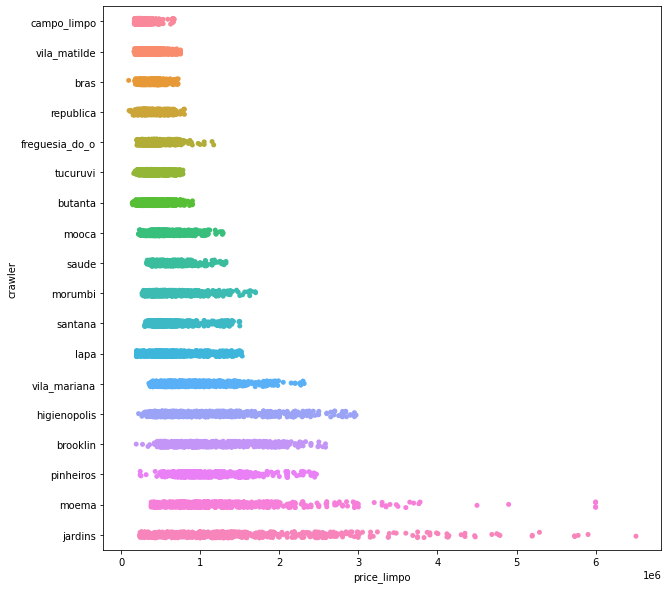

In [8]:
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="price_limpo", y= "crawler", order = order)

In [9]:
def plot_stripplot(df,var_name):
    order = df[["crawler", var_name]].groupby("crawler").mean().sort_values(by=var_name).index
    plt.figure(figsize=(10,10))
    return sns.stripplot(data=df, x = var_name, y = "crawler", order = order)

<AxesSubplot:xlabel='area_limpo', ylabel='crawler'>

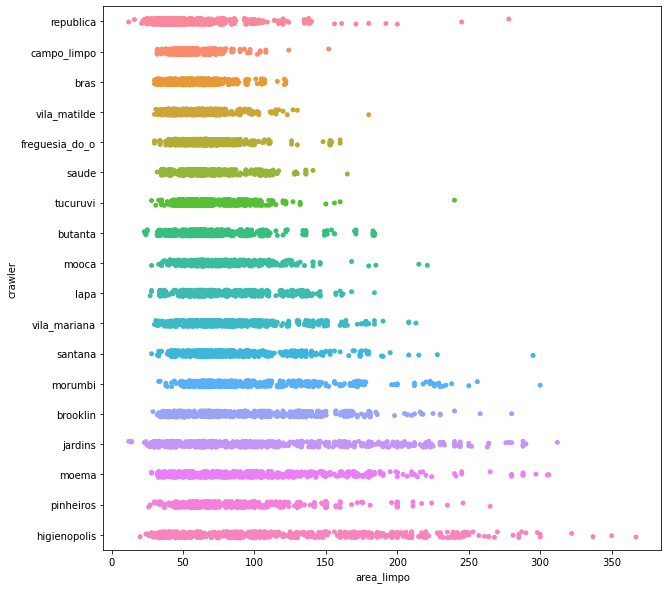

In [10]:
plot_stripplot(df,"area_limpo")

<AxesSubplot:xlabel='rooms_limpo', ylabel='crawler'>

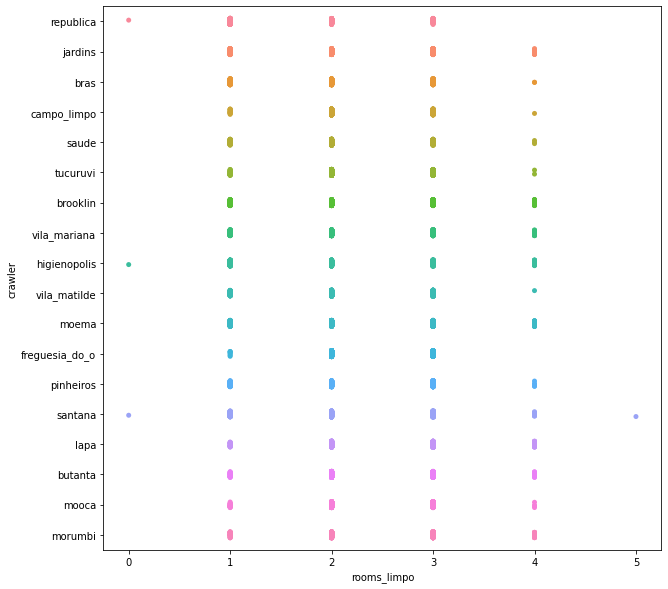

In [11]:
plot_stripplot(df,"rooms_limpo")

In [12]:
df["rooms_limpo"].value_counts(normalize=True)

2    0.523190
3    0.312419
1    0.146096
4    0.018037
0    0.000193
5    0.000064
Name: rooms_limpo, dtype: float64

In [13]:
df.loc[df["rooms_limpo"] == 0, "rooms_limpo"] = np.nan

<AxesSubplot:xlabel='bathrooms_limpo', ylabel='crawler'>

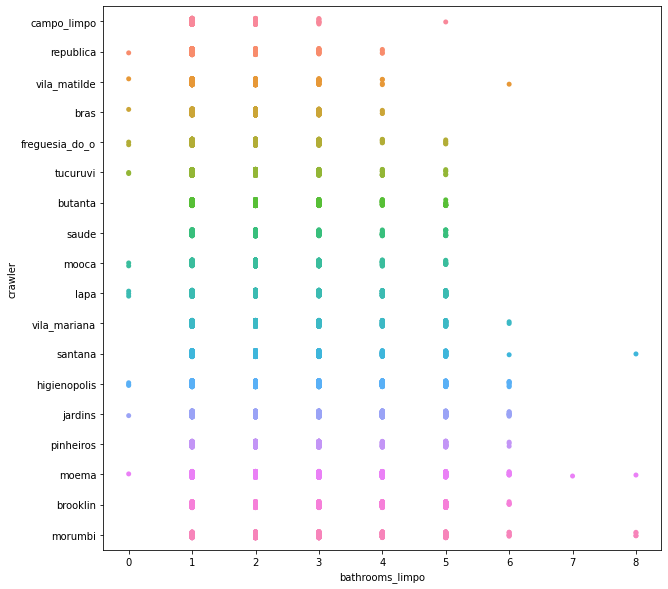

In [14]:
plot_stripplot(df,"bathrooms_limpo")

In [15]:
df["bathrooms_limpo"].value_counts(normalize=True)

2    0.448145
1    0.322726
3    0.132955
4    0.052757
5    0.039101
6    0.002770
0    0.001095
8    0.000386
7    0.000064
Name: bathrooms_limpo, dtype: float64

In [16]:
df.loc[df["bathrooms_limpo"].isin([0,8,6,7]),"bathrooms_limpo"] = np.nan 

<AxesSubplot:xlabel='garages_limpo', ylabel='crawler'>

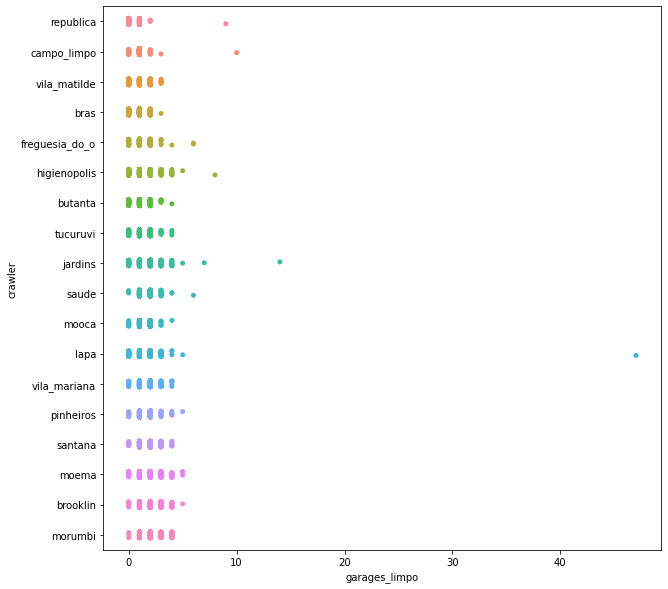

In [17]:
plot_stripplot(df,"garages_limpo")

In [18]:
df["garages_limpo"].value_counts(normalize= True)

1     0.567508
2     0.309778
0     0.078717
3     0.036073
4     0.006764
5     0.000580
6     0.000193
47    0.000064
7     0.000064
14    0.000064
10    0.000064
9     0.000064
8     0.000064
Name: garages_limpo, dtype: float64

In [19]:
df.loc[df["garages_limpo"]>5, "garages_limpo"] = np.nan

<AxesSubplot:xlabel='condo_limpo', ylabel='crawler'>

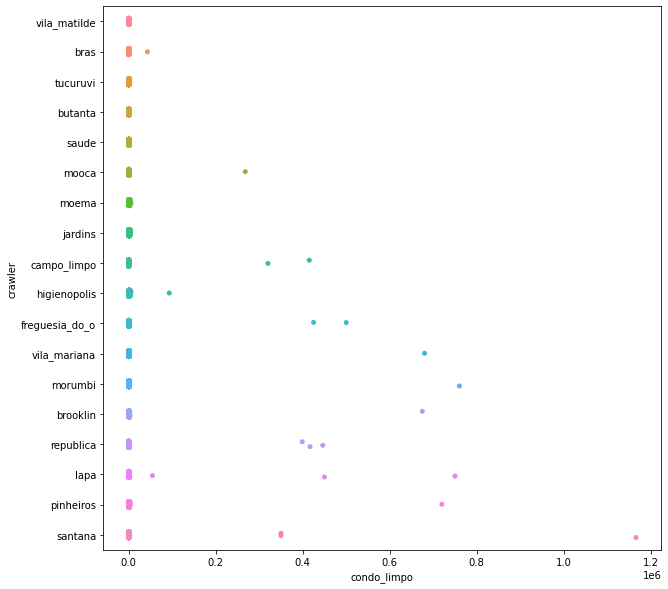

In [20]:
plot_stripplot(df,"condo_limpo")

In [21]:
df.loc[df["condo_limpo"]<100,"condo_limpo"] = np.nan

In [22]:
coluna = "condo_limpo"

for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"] == bairro, coluna])
    if pct_outliers > .035:
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"] == bairro, coluna])
    print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
    df.loc[(df["crawler"]==bairro) & (~df[coluna].between(lower_bound,upper_bound)),coluna] = np.nan

Coluna: condo_limpo, bairro: brooklin, metodo: iqr, pct_outliers: 0.21
Coluna: condo_limpo, bairro: butanta, metodo: iqr, pct_outliers: 0.12
Coluna: condo_limpo, bairro: republica, metodo: iqr, pct_outliers: 0.17
Coluna: condo_limpo, bairro: bras, metodo: iqr, pct_outliers: 0.22
Coluna: condo_limpo, bairro: freguesia_do_o, metodo: iqr, pct_outliers: 0.17
Coluna: condo_limpo, bairro: higienopolis, metodo: iqr, pct_outliers: 0.14
Coluna: condo_limpo, bairro: jardins, metodo: iqr, pct_outliers: 0.27
Coluna: condo_limpo, bairro: lapa, metodo: iqr, pct_outliers: 0.26
Coluna: condo_limpo, bairro: moema, metodo: iqr, pct_outliers: 0.19
Coluna: condo_limpo, bairro: mooca, metodo: iqr, pct_outliers: 0.1
Coluna: condo_limpo, bairro: morumbi, metodo: iqr, pct_outliers: 0.18
Coluna: condo_limpo, bairro: pinheiros, metodo: iqr, pct_outliers: 0.56
Coluna: condo_limpo, bairro: santana, metodo: iqr, pct_outliers: 0.19
Coluna: condo_limpo, bairro: saude, metodo: iqr, pct_outliers: 0.09
Coluna: condo_li

<AxesSubplot:xlabel='condo_limpo', ylabel='crawler'>

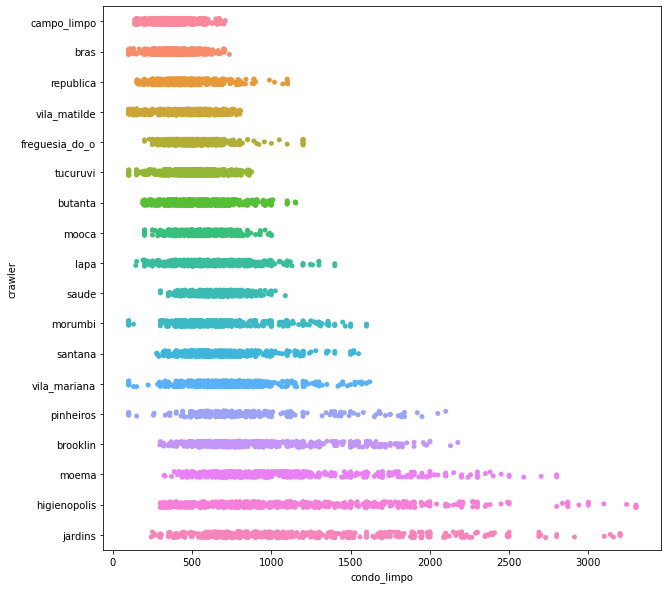

In [23]:
plot_stripplot(df,"condo_limpo")

In [24]:
df = df.dropna(subset=["area_limpo","bathrooms_limpo", "rooms_limpo","condo_limpo", "garages_limpo", "price_limpo"])

In [25]:
df = df.reset_index(drop=True)

In [28]:
df.to_csv("data_input.csv")